In [1]:
# 4 - number of races (popularity)

# 5 - british drivers dominate

# 3 - world champs top 5

# 1 - Retirments per decade - 

# 2 - cars safer accidents vs deaths






#1 - increased reliability
# 2 - world champions top 5 percentage vs rest of field
# same with poles
# 3 - number of races per year
# 4 - pit stop times 
# 5 - safety? retirements/
#disqualifications?
# 6 - fatalities

### Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import Formula 1 csv files

#f1_circuits = pd.read_csv('F1_circuits.csv') # Contains a list of all F1 tracks
f1_status = pd.read_csv('F1_status.csv') # Contains a Status Code for each driver foreach race
f1_drivers = pd.read_csv('F1_drivers.csv') # Contais a list of every driver to have driven in Formula 1
f1_races = pd.read_csv('F1_races.csv') # Contains data for every race in Formula 1
f1_results = pd.read_csv('F1_results.csv') # Contains data for results of every driver in every race in Formula 1

### Inspect & Reformat "Circuits" DataFrame

In [4]:
# Inspect "Circuits" DataFrame

#f1_circuits.info()

# 76 entries with zero null values
# Remove all columns except 'circuitId' & 'name'
# Required columns are correct Data Types

In [5]:
# Drop all columns except 'circuitId' & 'name'

#cols = [1,3,4,5,6,7,8]
#f1_circuits.drop(f1_circuits.columns[cols],axis=1,inplace=True)

In [6]:
#f1_circuits.head()

### Inspect "Status" DataFrame

In [7]:
# Inspect "Status" DataFrame

f1_status.info()

# 139 entries with zero null values
# All columns are correct Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  139 non-null    int64 
 1   status    139 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [8]:
f1_status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


### Bring in Fatality DataFrame from Web Scrape

In [9]:
# Import "World Champions" data from Wikipedia

fatalities_table = pd.read_html('https://en.wikipedia.org/wiki/\
List_of_Formula_One_fatalities',
match="Fatalities by driver")

In [10]:
# Create DataFrame from Table

f1_fatalities = pd.DataFrame(fatalities_table[0])

In [11]:
# Wikipedia page has merged cells in header and footer
# Save to csv and reimport, removing the first row and two bottom rows

#f1_world_champions.to_csv('F1.csv')
#f1_world_champions = pd.read_csv('F1.csv', index_col=0, skiprows=[1], skipfooter=2, engine='python')

In [12]:
# Inspect "World Champions" DataFrame

f1_fatalities.head()

# 74 entries with zero null values
# Remove all columns except 'Season' & 'Driver'
# Remove trailing data in both 'Season' & 'Driver' columns
# Convert Season from object to Date
# Required columns are correct Data Types

,Driver,Date of accident,Event,Circuit,Car,Session,Ref(s).
0,Cameron Earl (UK),"June 18, 1952",Test,MIRA,ERA,Test,[15]
1,Chet Miller (USA),"May 15, 1953",Indianapolis 500[note 1],Indianapolis Motor Speedway,Kurtis Kraft,Practice,[17]
2,Charles de Tornaco (BEL),"September 18, 1953",Modena Grand Prix,Autodromo di Modena,Ferrari Tipo 500,Practice,[18]
3,Onofre Marimón (ARG),"July 31, 1954",German Grand Prix,Nürburgring,Maserati 250F,Practice,[17]
4,Mario Alborghetti (ITA),"April 11, 1955",Pau Grand Prix,Circuit de Pau-Ville,Maserati 4CLT,Race,[19]


In [13]:
# Remove extraneous data in 'Driver' column

f1_fatalities_Driver_split = f1_fatalities['Date of accident'].str.split(',', expand=True)

#Assign back into original DataFrame

f1_fatalities['Date of accident'] = f1_fatalities_Driver_split[1]
f1_fatalities["Date of accident"] = f1_fatalities["Date of accident"].astype('int64')

In [14]:
f1_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Driver            52 non-null     object
 1   Date of accident  52 non-null     int64 
 2   Event             52 non-null     object
 3   Circuit           52 non-null     object
 4   Car               52 non-null     object
 5   Session           52 non-null     object
 6   Ref(s).           52 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.0+ KB


In [15]:
# Remove extraneous data in 'Driver' column

f1_fatalities_Driver_split = f1_fatalities['Driver'].str.split('(', expand=True)

#Assign back into original DataFrame

f1_fatalities['Driver'] = f1_fatalities_Driver_split[0]

In [16]:
# Remove all non F1 race deaths. Retain Only Events that are Grand Prix

f1_fatalities = f1_fatalities[~f1_fatalities['Event'].str.contains('Grand') == False]

In [17]:
f1_fatalities.head()


,Driver,Date of accident,Event,Circuit,Car,Session,Ref(s).
2,Charles de Tornaco,1953,Modena Grand Prix,Autodromo di Modena,Ferrari Tipo 500,Practice,[18]
3,Onofre Marimón,1954,German Grand Prix,Nürburgring,Maserati 250F,Practice,[17]
4,Mario Alborghetti,1955,Pau Grand Prix,Circuit de Pau-Ville,Maserati 4CLT,Race,[19]
10,Luigi Musso,1958,French Grand Prix,Circuit de Reims-Gueux,Ferrari 246 F1,Race,[17]
11,Peter Collins,1958,German Grand Prix,Nürburgring,Ferrari 246 F1,Race,[22]


In [18]:
f1_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 2 to 51
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Driver            30 non-null     object
 1   Date of accident  30 non-null     int64 
 2   Event             30 non-null     object
 3   Circuit           30 non-null     object
 4   Car               30 non-null     object
 5   Session           30 non-null     object
 6   Ref(s).           30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.9+ KB


In [19]:
# Drop all columns except Driver and Date of Accident

f1_fatalities.drop(f1_fatalities.loc[:, 'Event':'Ref(s).'].columns, axis=1).reset_index(drop=True)

,Driver,Date of accident
0,Charles de Tornaco,1953
1,Onofre Marimón,1954
2,Mario Alborghetti,1955
3,Luigi Musso,1958
4,Peter Collins,1958
5,Stuart Lewis-Evans,1958
6,Chris Bristow,1960
7,Alan Stacey,1960
8,Wolfgang von Trips,1961
9,Ricardo Rodríguez,1962


### Import "World Champions" DataFrame from Wikipedia Web Scrape

In [20]:
# Import "World Champions" data from Wikipedia

world_champions_table = pd.read_html('https://en.wikipedia.org/wiki/\
List_of_Formula_One_World_Drivers%27_Champions',
match="World Drivers' Champions by season")

In [21]:
# Create DataFrame from Table

f1_world_champions = pd.DataFrame(world_champions_table[0])

In [22]:
# Wikipedia page has merged cells in header and footer
# Save to csv and reimport, removing the first row and two bottom rows

f1_world_champions.to_csv('F1.csv')
f1_world_champions = pd.read_csv('F1.csv', index_col=0, skiprows=[1], skipfooter=2, engine='python')

In [23]:
# Inspect "World Champions" DataFrame

f1_world_champions.info()

# 74 entries with zero null values
# Remove all columns except 'Season' & 'Driver'
# Remove trailing data in both 'Season' & 'Driver' columns
# Required columns are correct Data Types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Season               74 non-null     object 
 1   Driver               74 non-null     object 
 2   Age                  74 non-null     int64  
 3   Constructor          74 non-null     object 
 4   Constructor.1        74 non-null     object 
 5   Tyres                74 non-null     object 
 6   Poles                74 non-null     int64  
 7   Wins                 74 non-null     int64  
 8   Podiums              74 non-null     int64  
 9   Fastest laps         74 non-null     int64  
 10  Points               74 non-null     float64
 11  % Points             74 non-null     object 
 12  Clinched[17]         74 non-null     object 
 13  # of racesremaining  74 non-null     int64  
 14  Margin               74 non-null     object 
 15  % Margin             74 non-null     objec

In [24]:
f1_world_champions.head()

,Season,Driver,Age,Constructor,Constructor.1,Tyres,Poles,Wins,Podiums,Fastest laps,Points,% Points,Clinched[17],# of racesremaining,Margin,% Margin
0,1950,Giuseppe Farina[20],44,Alfa Romeo,Alfa Romeo,P,2,3,3,3,30.0,83.333 (47.619),Race 7 of 7,0,3,10.000
1,1951,Juan Manuel Fangio[21],40,Alfa Romeo,Alfa Romeo,P,4,3,5,5,31.0,86.111 (51.389),Race 8 of 8,0,6,19.355
2,1952[a],Alberto Ascari[23],34,Ferrari,Ferrari,F P,5,6,6,6,36.0,100.000 (74.306),Race 6 of 8,2,12,33.333
3,1953[a],Alberto Ascari[23],35,Ferrari,Ferrari,P,6,5,5,4,34.5,95.833 (57.764),Race 8 of 9,1,6.5,18.841
4,1954,Juan Manuel Fangio[21],43,Maserati[b],Maserati,P,5,6,7,3,42.0,93.333 (70.547),Race 7 of 9,2,16.857,40.136


In [25]:
# Remove trailing data from season and driver

f1_world_champions_split = f1_world_champions['Season'].str.split('[', expand=True)
f1_world_champions['Season'] = f1_world_champions_split[0]
f1_world_champions_split = f1_world_champions['Driver'].str.split('[', expand=True)
f1_world_champions['Driver'] = f1_world_champions_split[0]

In [26]:
# Remove unwanted columns

f1_world_champions.drop(f1_world_champions.loc[:,'Age':'% Margin'].columns, axis=1, inplace=True)

In [27]:
# Groupby DataFrame and save

f1_world_champions=f1_world_champions.groupby([ "Driver"]).size().to_frame(name = 'TimesWorldChampion').reset_index()

In [28]:
f1_world_champions = f1_world_champions.sort_values('TimesWorldChampion', ascending = False).reset_index(drop=True)

In [29]:
f1_world_champions.head()

,Driver,TimesWorldChampion
0,Michael Schumacher,7
1,Lewis Hamilton,7
2,Juan Manuel Fangio,6
3,Alain Prost,4
4,Sebastian Vettel,4


### Inspect & Reformat "Drivers" DataFrame

In [30]:
# Inspect "Drivers" DataFrame

f1_drivers.info()

# 855 entries with zero null values
# Remove all columns except 'driverId',  'forename', 'surname' & 'nationality'
# Required columns are correct Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     855 non-null    int64 
 1   driverRef    855 non-null    object
 2   number       855 non-null    object
 3   code         855 non-null    object
 4   forename     855 non-null    object
 5   surname      855 non-null    object
 6   dob          855 non-null    object
 7   nationality  855 non-null    object
 8   url          855 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


In [31]:
# Drop all columns except 'driverId',  'forename', 'surname' & 'nationality'

cols = [1,2,3,6,8]
f1_drivers.drop(f1_drivers.columns[cols],axis=1,inplace=True)

In [32]:
# Create 'Full Name' column in DataFrame

f1_drivers["fullname"] = f1_drivers["forename"] + ' ' + f1_drivers["surname"]

In [33]:
# Move 'full name' position to after 'surname''

f1_drivers = f1_drivers.reindex(['driverId', 'forename', 'surname', 'fullname', 'nationality'], axis=1)

In [34]:
f1_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     855 non-null    int64 
 1   forename     855 non-null    object
 2   surname      855 non-null    object
 3   fullname     855 non-null    object
 4   nationality  855 non-null    object
dtypes: int64(1), object(4)
memory usage: 33.5+ KB


Because the World Champion data is coming from a different source, check to ensure that full names are consistent in both DataFrames

In [35]:
# check drivers to world champions on fullname
f1_name_check = pd.merge(f1_drivers,f1_world_champions, left_on='fullname', right_on='Driver', how='right')


In [36]:
f1_name_check[f1_name_check['fullname'].isna()]

,driverId,forename,surname,fullname,nationality,Driver,TimesWorldChampion
2,NaN,NaN,NaN,NaN,NaN,Juan Manuel Fangio,6
32,NaN,NaN,NaN,NaN,NaN,Giuseppe Farina,1


In [37]:
#find impacted rows in f1_drivers

f1_name_check = f1_drivers[f1_drivers.eval("surname == 'Fangio' or \
                                            surname == 'Farina'")]
print(f1_name_check)

     driverId forename surname     fullname nationality
579       579     Juan  Fangio  Juan Fangio   Argentine
642       642     Nino  Farina  Nino Farina     Italian


In [38]:
 # change forenames and surnames in f1_driver

f1_drivers['forename'] = f1_drivers['forename'].str.replace('Nino','Giuseppe')
f1_drivers['forename'] = f1_drivers['forename'].str.replace('Juan','Juan Manuel')
f1_drivers['fullname'] = f1_drivers['fullname'].str.replace('Nino Farina','Giuseppe Farina')
f1_drivers['fullname'] = f1_drivers['fullname'].str.replace('Juan Fangio','Juan Manuel Fangio')


In [39]:
print(f1_drivers.loc[f1_drivers['fullname'].isin(['Juan Manuel Fangio', 'Giuseppe Farina'])])

     driverId     forename surname            fullname nationality
579       579  Juan Manuel  Fangio  Juan Manuel Fangio   Argentine
642       642     Giuseppe  Farina     Giuseppe Farina     Italian


In [40]:
f1_drivers.isna().sum()

driverId       0
forename       0
surname        0
fullname       0
nationality    0
dtype: int64

### Merge "World Champions" DataFrame into "Drivers" DataFrame

In [41]:
f1_drivers.head(10)

,driverId,forename,surname,fullname,nationality
0,1,Lewis,Hamilton,Lewis Hamilton,British
1,2,Nick,Heidfeld,Nick Heidfeld,German
2,3,Nico,Rosberg,Nico Rosberg,German
3,4,Fernando,Alonso,Fernando Alonso,Spanish
4,5,Heikki,Kovalainen,Heikki Kovalainen,Finnish
5,6,Kazuki,Nakajima,Kazuki Nakajima,Japanese
6,7,Sébastien,Bourdais,Sébastien Bourdais,French
7,8,Kimi,Räikkönen,Kimi Räikkönen,Finnish
8,9,Robert,Kubica,Robert Kubica,Polish
9,10,Timo,Glock,Timo Glock,German


In [42]:
# Merge "Warld Champions" data into "Drivers"

f1_drivers = pd.merge(f1_drivers,f1_world_champions, left_on='fullname', right_on='Driver', how='outer')



In [46]:
# Remove unwanted columns
f1_drivers.drop(['Driver'], axis=1, inplace=True)

In [47]:
# Inspect f1_drivers post-merge 

f1_drivers.head(10)

,driverId,forename,surname,fullname,nationality,TimesWorldChampion
0,1,Lewis,Hamilton,Lewis Hamilton,British,7.0
1,2,Nick,Heidfeld,Nick Heidfeld,German,NaN
2,3,Nico,Rosberg,Nico Rosberg,German,1.0
3,4,Fernando,Alonso,Fernando Alonso,Spanish,2.0
4,5,Heikki,Kovalainen,Heikki Kovalainen,Finnish,NaN
5,6,Kazuki,Nakajima,Kazuki Nakajima,Japanese,NaN
6,7,Sébastien,Bourdais,Sébastien Bourdais,French,NaN
7,8,Kimi,Räikkönen,Kimi Räikkönen,Finnish,1.0
8,9,Robert,Kubica,Robert Kubica,Polish,NaN
9,10,Timo,Glock,Timo Glock,German,NaN


In [48]:
# Replace NULL values with zero

f1_drivers['TimesWorldChampion'] = f1_drivers['TimesWorldChampion'].fillna(0).astype(np.int64)

In [49]:
# Change driverId from float to int

f1_drivers['driverId'] = f1_drivers['driverId'].astype(np.int64)

In [50]:
f1_drivers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 0 to 854
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   driverId            855 non-null    int64 
 1   forename            855 non-null    object
 2   surname             855 non-null    object
 3   fullname            855 non-null    object
 4   nationality         855 non-null    object
 5   TimesWorldChampion  855 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 46.8+ KB


In [51]:
f1_drivers.head()

,driverId,forename,surname,fullname,nationality,TimesWorldChampion
0,1,Lewis,Hamilton,Lewis Hamilton,British,7
1,2,Nick,Heidfeld,Nick Heidfeld,German,0
2,3,Nico,Rosberg,Nico Rosberg,German,1
3,4,Fernando,Alonso,Fernando Alonso,Spanish,2
4,5,Heikki,Kovalainen,Heikki Kovalainen,Finnish,0


### Inspect & Reformat "Races" DataFrame

In [52]:
# Inspect "Results" DataFrame

f1_races.info()

# 1,079 entries with zero null values
# Remove all columns except 'raceId', 'year',  'circuitId', 'name' 
# Rename "name" to "racename"
# Required columns are correct Data Types except for date 
# which need to be converted from object to date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1079 non-null   int64 
 1   year         1079 non-null   int64 
 2   round        1079 non-null   int64 
 3   circuitId    1079 non-null   int64 
 4   name         1079 non-null   object
 5   date         1079 non-null   object
 6   time         1079 non-null   object
 7   url          1079 non-null   object
 8   fp1_date     1079 non-null   object
 9   fp1_time     1079 non-null   object
 10  fp2_date     1079 non-null   object
 11  fp2_time     1079 non-null   object
 12  fp3_date     1079 non-null   object
 13  fp3_time     1079 non-null   object
 14  quali_date   1079 non-null   object
 15  quali_time   1079 non-null   object
 16  sprint_date  1079 non-null   object
 17  sprint_time  1079 non-null   object
dtypes: int64(4), object(14)
memory usage: 151.9+ KB


In [53]:
# Drop all columns except 'raceId', 'year',  'circuitId', 'name' & 'date'

#f1_races.drop('round', axis = 1, inplace = True)
f1_races.drop(f1_races.loc[:,'round':'sprint_time'].columns, axis=1, inplace=True)

In [54]:
f1_races.head()

,raceId,year
0,1,2009
1,2,2009
2,3,2009
3,4,2009
4,5,2009


In [55]:
#f1_races["year"] = f1_races["year"].astype('datetime64[ns]')

In [56]:
# Merge "Circuits" data into "Races" DataFrame

#f1_races = pd.merge(f1_races,f1_circuits, on='circuitId', how='inner')

In [57]:
#f1_races.info()

In [58]:
# Rename "name_x" & "name_y" columns

#f1_races.rename(columns={'name_x': 'racename','name_y':'circuitname'},inplace=True)

In [59]:
#f1_races.head()

### Inspect & Reformat "Results" DataFrame

In [60]:
# Inspect "Results" DataFrame
# 25,840 entries with zero null values
# Remove all columns except 'raceId', 'driverId', 'positionText'  
# 'positionOrder', 'fastestLapSpeed' & 'statusId'

f1_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number           25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         25840 non-null  object 
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time             25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  object 
 17  statusId    

In [61]:
f1_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [62]:
# Merge "Status" data into "Results" DataFrame
f1_results = pd.merge(f1_results,f1_status,on='statusId', how='inner')

In [63]:
# Merge "Drivers" data into "Results" DataFrame

f1_results = pd.merge(f1_results,f1_drivers,on='driverId', how='inner')

In [64]:
# Merge "Races" data into "Results" DataFrame

f1_results = pd.merge(f1_results,f1_races,on='raceId', how='inner')

In [65]:
f1_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,status,forename,surname,fullname,nationality,TimesWorldChampion,year
0,1,18,1,1,22,1,1,1,1,10.0,...,1:27.452,218.300,1,Finished,Lewis,Hamilton,Lewis Hamilton,British,7,2008
1,2,18,2,2,3,5,2,2,2,8.0,...,1:27.739,217.586,1,Finished,Nick,Heidfeld,Nick Heidfeld,German,0,2008
2,3,18,3,3,7,7,3,3,3,6.0,...,1:28.090,216.719,1,Finished,Nico,Rosberg,Nico Rosberg,German,1,2008
3,4,18,4,4,5,11,4,4,4,5.0,...,1:28.603,215.464,1,Finished,Fernando,Alonso,Fernando Alonso,Spanish,2,2008
4,5,18,5,1,23,3,5,5,5,4.0,...,1:27.418,218.385,1,Finished,Heikki,Kovalainen,Heikki Kovalainen,Finnish,0,2008


In [66]:
f1_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25840 entries, 0 to 25839
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   resultId            25840 non-null  int64  
 1   raceId              25840 non-null  int64  
 2   driverId            25840 non-null  int64  
 3   constructorId       25840 non-null  int64  
 4   number              25840 non-null  object 
 5   grid                25840 non-null  int64  
 6   position            25840 non-null  object 
 7   positionText        25840 non-null  object 
 8   positionOrder       25840 non-null  int64  
 9   points              25840 non-null  float64
 10  laps                25840 non-null  int64  
 11  time                25840 non-null  object 
 12  milliseconds        25840 non-null  object 
 13  fastestLap          25840 non-null  object 
 14  rank                25840 non-null  object 
 15  fastestLapTime      25840 non-null  object 
 16  fast

In [67]:
# Drop all columns except 'positionText', 'positionOrder' & 'status'
cols = [0,1,2,3,4,5,6,9,11,12,13,14,15,16,17,19,20,23]
f1_results.drop(f1_results.columns[cols],axis=1,inplace=True)

In [68]:
f1_results.head()

,positionText,positionOrder,laps,status,fullname,nationality,year
0,1,1,58,Finished,Lewis Hamilton,British,2008
1,2,2,58,Finished,Nick Heidfeld,German,2008
2,3,3,58,Finished,Nico Rosberg,German,2008
3,4,4,58,Finished,Fernando Alonso,Spanish,2008
4,5,5,58,Finished,Heikki Kovalainen,Finnish,2008


### number of races per year

In [69]:
f1_numberofraces = f1_races.groupby(["year"]).size().to_frame(name = 'NumberOfRaces').reset_index()

In [70]:
f1_numberofraces

,year,NumberOfRaces
0,1950,7
1,1951,8
2,1952,8
3,1953,9
4,1954,9
...,...,...
68,2018,21
69,2019,21
70,2020,17
71,2021,22


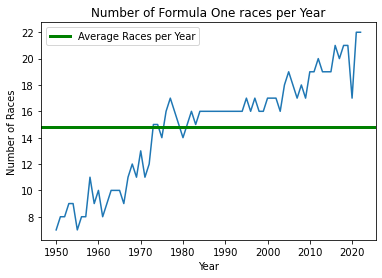

In [71]:
plt.plot(f1_numberofraces["year"], f1_numberofraces["NumberOfRaces"])
plt.axhline(y = np.nanmean(f1_numberofraces.NumberOfRaces),color='green',linewidth=3,label='Average Races per Year')

# Add plot title
plt.title("Number of Formula One races per Year")

# Add axis labels
plt.xlabel("Year")
plt.ylabel("Number of Races")

# Add legend label
plt.legend(loc='best')
plt.show()

### retirement graph

In [72]:
f1_retirements = f1_results[f1_results.eval("positionText == 'R' & \
                                            status != 'Accident' & \
                                            status != 'Collision' & \
                                            status != 'Collision damage' & \
                                            status != 'Spun off' & \
                                            status != 'Suspension' & \
                                            status != 'Withdrew'")]

In [73]:
# Groupby DataFrame and save
f1_retirements = f1_retirements.groupby(["year"]).size().to_frame(name = 'NumberOfRetirements').reset_index()

In [74]:
f1_retirements.to_csv('f1_retirements.csv')  

In [75]:
f1_retirements.count()

year                   73
NumberOfRetirements    73
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

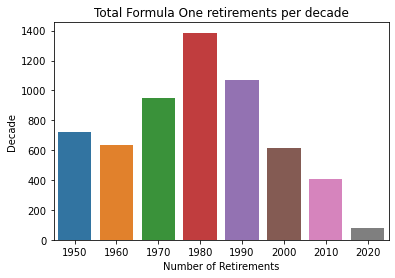

In [76]:
f1_retirements['year'] = f1_retirements['year'] - f1_retirements['year'] % 10
df_decade = (f1_retirements.groupby(['year']).sum().reset_index())
ax = sns.barplot(x="year", y="NumberOfRetirements", data=df_decade)

# Add plot title
plt.title('Total Formula One retirements per decade')

# Add axis labels
plt.xlabel('Number of Retirements')
plt.ylabel('Decade')

plt.show

https://en.wikipedia.org/wiki/Formula_One_engines#:~:text=By%20mid%2D1985%2C%20every%20Formula,670%20kW)%20in%20race%20spec.


By mid-1985, every Formula One car was running with a turbocharged engine. BMW's straight-4 turbo, the M12/13, produced around 1,400–1,500 hp (1,040–1,120 kW) at over 5 bar of boost in qualifying trim, but was detuned to produce between 850–900 hp (630–670 kW) in race spec. It powered the Brabham BT52 of 1983, with which Nelson Piquet won that year's Drivers' Championship. By 1986, power figures were reaching unprecedented levels, with all engines reaching over 1,000 hp (750 kW) during qualifying with unrestricted turbo boost pressures. This was especially seen with the BMW engines of Benetton's cars, reaching around 1,400 hp (1,040 kW) at a 5.5 bar boost pressure during qualifying. However, these engines and gearboxes were very unreliable because of the engine's immense power, and would only last about four laps

Turbochargers were banned from the 1989 Formula One season, leaving only a naturally aspirated 3.5 L formula




### nationality of winners

In [77]:
f1_nationality = f1_results[f1_results.eval("positionOrder == 1")]

In [78]:
# 
f1_nationality = f1_nationality.groupby(["nationality"]).size().to_frame(name = 'NumberOfNationalities').reset_index()

In [79]:
f1_nationality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   nationality            23 non-null     object
 1   NumberOfNationalities  23 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 496.0+ bytes


Text(0, 0.5, 'Nationality')

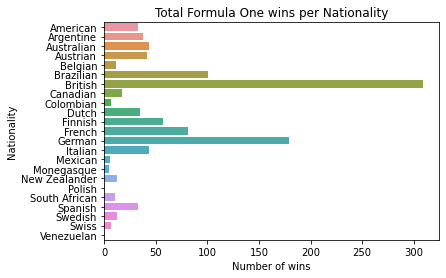

In [80]:
# Create horizontal barplot
sns.barplot(x = f1_nationality.NumberOfNationalities, y = f1_nationality.nationality, orient='h')

# Add plot title
plt.title('Total Formula One wins per Nationality')

# Add axis labels
plt.xlabel('Number of wins')
plt.ylabel('Nationality')

### % world champions

In [169]:
for i in range(len(f1_world_champions)):
    if f1_world_champions.loc[i, "TimesWorldChampion"] >= 4:
        print(f1_world_champions.loc[i])


Driver                Michael Schumacher
TimesWorldChampion                     7
Name: 0, dtype: object
Driver                Lewis Hamilton
TimesWorldChampion                 7
Name: 1, dtype: object
Driver                Juan Manuel Fangio
TimesWorldChampion                     6
Name: 2, dtype: object
Driver                Alain Prost
TimesWorldChampion              4
Name: 3, dtype: object
Driver                Sebastian Vettel
TimesWorldChampion                   4
Name: 4, dtype: object


In [170]:
# Import pandas library
import pandas as pd
  
# initialize list of lists
f1_world_champions_top_5 = [['top 5 drivers', (f1_world_champions['TimesWorldChampion'][:5].sum())], ['rest of drivers', (f1_world_champions['TimesWorldChampion'][5:].sum())]]
  
# Create the pandas DataFrame
f1_world_champions_top_5 = pd.DataFrame(f1_world_champions_top_5, columns=['DriversGrouped', 'NumberOfChampionships'])
  
# print dataframe.
f1_world_champions_top_5

,DriversGrouped,NumberOfChampionships
0,top 5 drivers,28
1,rest of drivers,46


<AxesSubplot:>

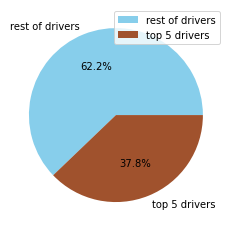

In [171]:
import pandas as pd
  

f1_world_champions_top_5.groupby(['DriversGrouped']).sum().plot(
    kind='pie', y='NumberOfChampionships', ylabel = '', autopct='%0.1f%%', colors = ['skyblue', 'sienna'], shadow=False)

In [ ]:
#f1_world_champions_top_5['pct'] = (f1_world_champions_top_5['NumberOfChampionships'] / f1_world_champions_top_5['NumberOfChampionships'].sum()) * 100

In [ ]:
#import pandas as pd
  
# DataFrame of each student and the votes they get

  
# Plotting the pie chart for above dataframe
#f1_world_champions_top_5.groupby(['DriversGrouped']).sum().plot(
#    kind='pie', y='pct', autopct='%1.0f%%')

### accident scatter

In [83]:
f1_accidents = f1_results[f1_results.eval("positionText == 'R' & \
                                            status == 'Accident' or \
                                            status == 'Collision'")]

In [84]:
f1_accidents = f1_accidents.groupby(["year"]).size().to_frame(name = 'NumberOfAccidents').reset_index()

In [85]:
print(f1_accidents)

    year  NumberOfAccidents
0   1950                 12
1   1951                  9
2   1952                  5
3   1953                  9
4   1954                 10
..   ...                ...
68  2018                 26
69  2019                 20
70  2020                 18
71  2021                 25
72  2022                 18

[73 rows x 2 columns]


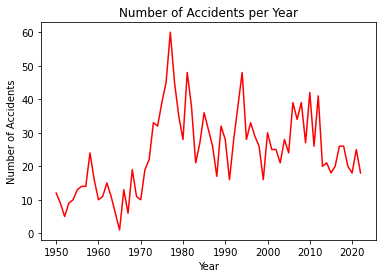

In [86]:
plt.plot(f1_accidents["year"], f1_accidents["NumberOfAccidents"], color = 'red')
plt.title("Number of Accidents per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()

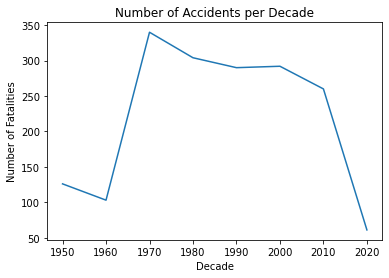

In [87]:
f1_accidents['year'] = f1_accidents['year'] - f1_accidents['year'] % 10
df_decade = (f1_accidents.groupby(['year']).sum().reset_index())
plt.title("Number of Accidents per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Fatalities")

ax = sns.lineplot(x="year", y="NumberOfAccidents", data=df_decade)


### fatality lineplot

In [88]:
f1_fatalities = f1_fatalities.groupby(["Date of accident"]).size().to_frame(name = 'NumberOfFatalities').reset_index()

In [89]:
#f1_fatality.head()

In [90]:
#sns.barplot(x=f1_fatalities['year'],y=f1_fatality['NumberOfFatalities']);

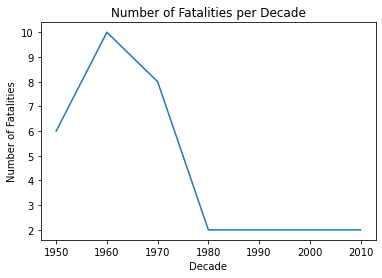

In [91]:
#plt.plot(f1_fatalities["Date of accident"], f1_fatalities["NumberOfFatalities"], color = 'blue')
#plt.title("Number of Fatalities per Year")
#plt.xlabel("Year")
#plt.ylabel("Number of Fatalities")
#plt.show()




f1_fatalities['Date of accident'] = f1_fatalities['Date of accident'] - f1_fatalities['Date of accident'] % 10
df_decade = (f1_fatalities.groupby(['Date of accident']).sum().reset_index())

plt.title("Number of Fatalities per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Fatalities")

ax = sns.lineplot(x="Date of accident", y="NumberOfFatalities", data=df_decade)

### Experienced drivers

In [92]:
f1_experience = f1_results.groupby(['fullname']).size().to_frame(name = 'NumberOfRaces').reset_index()
f1_experience.sort_values('NumberOfRaces', ascending=False)

,fullname,NumberOfRaces
256,Fernando Alonso,358
501,Kimi Räikkönen,352
748,Rubens Barrichello,326
522,Lewis Hamilton,310
410,Jenson Button,309
...,...,...
436,Joe Fry,1
431,Jo Vonlanthen,1
1,Adolfo Cruz,1
426,Jimmy Stewart,1


Text(0, 0.5, 'Driver')

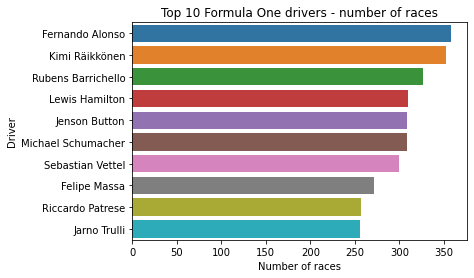

In [93]:
sns.barplot(
    x = 'NumberOfRaces',
    y = 'fullname',
    data=f1_experience.nlargest(10, 'NumberOfRaces')
)

# Add plot title
plt.title('Top 10 Formula One drivers - number of races')

# Add axis labels
plt.xlabel('Number of races')
plt.ylabel('Driver')

### Best conversion of races for wins

In [94]:
f1_individual_wins = f1_results[f1_results.eval("positionOrder == 1")].reset_index()
f1_individual_wins = f1_individual_wins.groupby(['fullname']).size().to_frame(name = 'positionOrder').reset_index()
f1_individual_wins = f1_individual_wins.rename(columns = {'positionOrder':'NumberOfWins'}, inplace = False)
f1_individual_wins.sort_values('NumberOfWins', ascending=False)


,fullname,NumberOfWins
66,Lewis Hamilton,103
75,Michael Schumacher,91
104,Sebastian Vettel,53
0,Alain Prost,51
4,Ayrton Senna,41
...,...,...
34,Heikki Kovalainen,1
90,Peter Gethin,1
58,Johnnie Parsons,1
36,Innes Ireland,1


In [153]:
f1_conversion_rate = pd.merge(f1_experience,f1_individual_wins, on = 'fullname', how='inner').reset_index(drop=True)

#drivers who never won a race have been dropped


#f1_safety = pd.merge(f1_accidents,f1_fatalities, left_on = 'year', right_on = 'Date of accident', how='left')

In [154]:
f1_conversion_rate.head(3)

,fullname,NumberOfRaces,NumberOfWins
0,Alain Prost,202,51
1,Alan Jones,117,12
2,Alberto Ascari,36,13


In [155]:
#new Pct column
f1_conversion_rate['Percent'] = ((f1_conversion_rate.NumberOfWins / f1_conversion_rate.NumberOfRaces)*100).reset_index(drop=True)
f1_conversion_rate.sort_values('Percent', ascending=False, inplace=True)


In [156]:
# qualifier of minimum 20 races
f1_conversion_rate = f1_conversion_rate[~(f1_conversion_rate['NumberOfWins'] <= 20)].reset_index(drop=True)

In [157]:
# drop all drivers except the 10 with highest percentage of win conversions
f1_conversion_rate = f1_conversion_rate.iloc[:10]

In [158]:
f1_conversion_rate

,fullname,NumberOfRaces,NumberOfWins,Percent
0,Juan Manuel Fangio,58,24,41.379310
1,Jim Clark,73,25,34.246575
2,Lewis Hamilton,310,103,33.225806
3,Michael Schumacher,308,91,29.545455
4,Jackie Stewart,100,27,27.000000
5,Ayrton Senna,162,41,25.308642
6,Alain Prost,202,51,25.247525
7,Max Verstappen,163,35,21.472393
8,Damon Hill,122,22,18.032787
9,Sebastian Vettel,300,53,17.666667


In [159]:
f1_conversion_rate.sort_values('Percent', ascending=True, inplace=True)

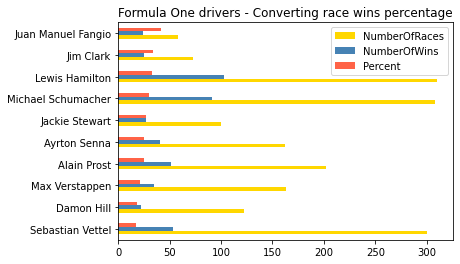

In [164]:
import pandas as pd
import matplotlib.pyplot as plt



# plotting stacked Horizontal Bar Chart with all the columns
f1_conversion_rate.plot.barh(x='fullname', xlabel = '', ylabel = '', title= 'Formula One drivers - Converting race wins percentage', color=("gold", "steelblue", 'tomato'))

# display the plotted Horizontal Bar Chart
plt.show()

<AxesSubplot:xlabel='fullname'>

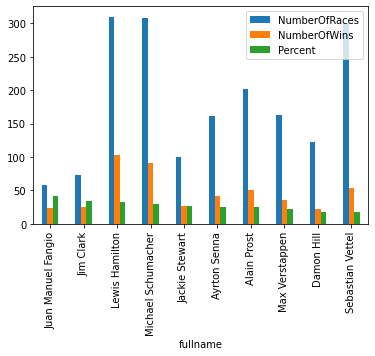

In [141]:
f1_conversion_rate[['fullname', 'NumberOfRaces', 'NumberOfWins', 'Percent']].plot(x='fullname', kind='bar')

In [98]:


# top 10


#sort
#f1_conversion_rate.sort_values('Percent', ascending=False)

Driver                Michael Schumacher
TimesWorldChampion                     7
Name: 0, dtype: object
Driver                Lewis Hamilton
TimesWorldChampion                 7
Name: 1, dtype: object
Driver                Juan Manuel Fangio
TimesWorldChampion                     6
Name: 2, dtype: object
Driver                Alain Prost
TimesWorldChampion              4
Name: 3, dtype: object
Driver                Sebastian Vettel
TimesWorldChampion                   4
Name: 4, dtype: object


In [ ]:
f1_conversion_rate.nlargest(10, ['Percent'])

In [ ]:
f1_conversion_rate.drop(f1_conversion_rate.index[:10], inplace=True)


In [99]:
f1_conversion_rate.head(18)

,fullname,NumberOfRaces,NumberOfWins,Percent
0,Alain Prost,202,51,25.247525
1,Ayrton Senna,162,41,25.308642
2,Damon Hill,122,22,18.032787
3,Fernando Alonso,358,32,8.938547
4,Jackie Stewart,100,27,27.000000
5,Jim Clark,73,25,34.246575
6,Juan Manuel Fangio,58,24,41.379310
7,Kimi Räikkönen,352,21,5.965909
8,Lewis Hamilton,310,103,33.225806
9,Max Verstappen,163,35,21.472393


In [ ]:
f1_driver_wins = f1_results.groupby(['fullname']).size().to_frame(name = 'NumberOfRaces').reset_index()

In [103]:
f1_conversion 

NameError: name 'f1_conversion' is not defined

In [ ]:
f1_conversion = f1_conversion['fullname'].unique()

In [ ]:
f1_conversion['NumberOfWins'] = (
    f1_results['positionOrder'].where(f1_results['positionOrder'] == 1).groupby(f1_results['fullname']).transform('sum'))

In [ ]:
df['new_group'] = df.groupby("id")["group"] \
                    .transform(lambda x: 'two' if (x.nunique() == 2) else x)

In [ ]:
f1_conversion.insert(loc=2, column='NumberOflaps', value = f1_laps['laps'])

In [ ]:
f1_conversion['NumberOfWins'] = f1_results['fullname'].groupby(df['Date']).transform('sum')

In [ ]:
f1_conversion

### most laps driven in F1

In [ ]:
#f1_laps = f1_results.groupby(['f1_results','laps']).sum().reset_index()

In [ ]:
f1_laps = f1_results.groupby(['fullname'])['laps'].agg('sum').reset_index()

In [ ]:
sns.barplot(
    x = 'laps',
    y = 'fullname',
    data=f1_laps.nlargest(10, 'laps')
)

# Add plot title
plt.title('Top 10 Formula One drivers - number of laps')

# Add axis labels
plt.xlabel('Number of completed laps')
plt.ylabel('Driver')

In [ ]:
f1_experience

In [ ]:
f1_conversion = pd.DataFrame(f1_results)

In [ ]:
f1_conversion.info()

In [ ]:
f1_conversion = f1_conversion['fullname'].unique()
f1_conversion = pd.DataFrame(f1_conversion)

In [ ]:
print(f1_conversion)

In [ ]:
f1_conversion = f1_conversion.rename(columns = {0: 'fullname'}, inplace = False)

In [ ]:
f1_conversion.insert(loc=1, column='NumberOfRaces', value = f1_laps['laps'])

In [ ]:
#'f1_results.groupby(['fullname'])['laps'].agg('sum')

In [ ]:
f1_conversion

In [ ]:
air_quality["ratio_paris_antwerp"] = (
    air_quality["station_paris"] / air_quality["station_antwerp"]

### Most experienced driver

In [ ]:
#f1_experience = pd.DataFrame(f1_results)


In [ ]:
f1_experience = f1_results.groupby(['fullname']).size().to_frame(name = 'NumberOfRaces').reset_index()

In [ ]:
print(f1_results)

In [ ]:
print(f1_experience.head(10))

In [ ]:
print(f1_results.head(10))

### Most laps driven

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns
f1_fatalities.plot('Date of accident', ax=ax1)
f1_accidents.plot('year', ax=ax2)

#plt.tight_layout()  # Optional ... often improves the layout

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_df = pd.DataFrame(np.random.randint(0,100,size=(15, 2)), columns=list('AB'))
model_df = pd.DataFrame(np.random.randint(0,100,size=(15, 2)), columns=list('AB'))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

for col, ax in zip(data_df, axes):
    data_df[col].plot(ax=ax, label=f"data_df ({col})")
    model_df[col].plot(ax=ax, label=f"model_df ({col})")
    ax.legend()

In [ ]:
f1_fatalities=f1_fatalities.groupby(["Date of accident"]).size().to_frame(name = 'number').reset_index()

In [ ]:
f1_fatalities.to_csv('safety_fatalities.csv')

In [ ]:
f1_safety = pd.melt(df, id_vars="year", value_vars=["NumberOfAccidents", "NumberOfFatalities"])
sns.lineplot(data=f1_safety, x="year", y="value", hue="variable")

In [ ]:
f1_accidents.head(1)

In [ ]:
f1_fatalities.head(1)

In [ ]:
#Add Safety
#f1_safety = pd.merge(f1_accidents,f1_fatalities, left_on = 'year', right_on = 'Date of accident', how='left')

In [ ]:
f1_safety = pd.read_csv ('safety_accidents.csv')

In [ ]:
f1_safety = pd.DataFrame(f1_safety)

In [ ]:
f1_safety.info()

In [ ]:
#**************************************************look atthis

f1_safety.set_index("year").plot()
sns.lineplot(x=f1_safety['NumberOfFatalities'].sum(),y=f1_safety['NumberOfAccidents'].sum(), hue = f1_safety['year'])
plt.show()







In [ ]:
#change n/a to 0

f1_safety['NumberOfFatalities'] = f1_safety['NumberOfFatalities'].fillna(0)

In [ ]:
#f1_safety['NumberOfFatalities'].astype('int64')


f1_safety[("NumberOfFatalities")] = f1_safety[("NumberOfFatalities")].astype(int)

In [ ]:
print(f1_safety)

In [ ]:


f1_safety.plot(x="year", y=["NumberOfAccidents", "NumberOfFatalities"], kind="bar")

In [ ]:
f1_safety = pd.melt(df, id_vars="year", value_vars=["NumberOfAccidents", "NumberOfFatalities"])
sns.lineplot(data=f1_safety, x="year", y="value", hue="variable")

In [ ]:
print(f1_safety)

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np

plt.scatter(x = f1_retirements['year'],y = f1_retirements['NumberOfRetirements']);


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('train_feature_store.csv')
df.info
df.head
df.columns

plt.figure(figsize=(20,6))
sns.countplot(x='Store', data=f1_world_champions)
plt.show()

Size = df[['Size','Store']].groupby(['Store'], as_index=False).sum()

df1 = Size.sort_values(by=['Size'],ascending=False).head(10).reset_index(drop=True)
df1['Percentage'] = (df1['Size'] / df1['Size'].sum()) * 100
df1.loc[10,:] = ['Grand Total', df1.Size.sum(), 100]

Size.sort_values(by=['Size'],ascending=False).head(10)

In [ ]:
f1_circuits.head()
 

In [ ]:
f1_status.head()


In [ ]:
f1_drivers.head()


In [ ]:
f1_world_champions.head()

In [ ]:
f1_races.head()


In [ ]:
f1_results.count()

In [ ]:
df1.sort_values('cost', ascending = False).groupby('usage_start_date').head(5).pivot(index="usage_start_date", columns="service_name", values="cost").plot(kind="bar", stacked=True, width=0.2)

In [ ]:
top5=f1_world_champions['TimesWorldChampion'].value_counts().nlargest(5)

In [ ]:
top5

In [ ]:
print(f1_world_champions)

In [ ]:
# Add new column "Percent"

f1_world_champions['Percent'] = (f1_world_champions.TimesWorldChampion / f1_world_champions.TimesWorldChampion.sum())*100